In [2]:
import sys
import pandas
sys.path.append("..")
#import pandas\
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
datadir0  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Equilibrium/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/TechnicalProject/Fig_Equilibrium/Plots/'
clrs1 = ['#a1dab4','#41b6c4','#2c7fb8','#253494'] #Bond making colour scheme
clrs2 = ['#7f0000','#d7301f','#fc8d59','#fdcc8a','#fef0d9','#fdcc8a','#fc8d59','#d7301f','#fef0d9'] #Bond breaking colour scheme
clrs3 = ['#a6611a','#dfc27d','#80cdc1','#018571','steelblue','slateblue'] #equilibrium colour scheme
markes = ['v','+','o','s']
mss = [10,10.0,9.5,8.5]

Data is from : Scratch/Collagen/model_strict_tetramer/EquilibriumSeededWorkflow/Plotting/AlignmentAndFitting.ipynb

()
12
28
40
44
56
72


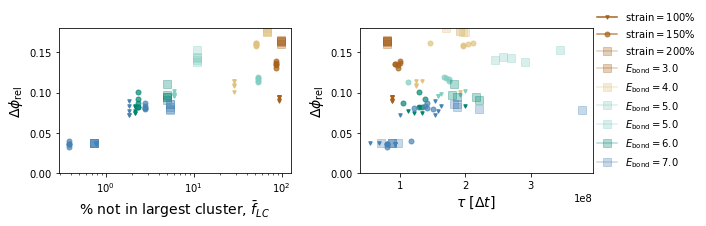

In [3]:

fname3 = "Equilib_DeltaPhi_NLC_tau.txt"
f3 = pandas.read_csv(datadir0 + fname3,sep = " ",header = 'infer')
Ebond = f3.Ebond.values
#Ebond= Ebond_.values
Strain = f3.Strain.values
Seed  = f3.Seed.values
NLC = f3.NLC.values
DeltaPhi = f3.DeltaPhi.values
Tau = f3.tau.values
fig,ax = plt.subplots(1,2,figsize = (10,3))
print(np.shape(Ebond[0]))
chemengV = [3,4,5,6,7,10]
xStretchV = [100,150,200]
markes = ['v','o','s','+']
mss = [3.5,5.0,7.5]
alss = [1.0,0.7,0.3]
for i in range(len(Ebond)):
    #print(Ebond[i])
    for pp in range(len(chemengV)):
        if Ebond[i] == chemengV[pp]:
            clr =  clrs3[pp]
            label2 = r"$E_{\mathrm{bond}} = $"+str(Ebond[i])
    for dd in range(len(xStretchV)):
        if Strain[i] == xStretchV [dd]:
            symb = markes[dd]
            ms = mss[dd]
            als = alss[dd]
            label1 = r"strain$ = $"+str(Strain[i])+r"$\%$"
    #ax.plot(Tau[i],DeltaPhi[i],marker = symb, color = clr)
    if i<15 and i%5==0:
        ax[1].plot(Tau[i],DeltaPhi[i],marker = symb, color = clr,markersize = ms,alpha = als,label = label1)
    if Strain[i] == xStretchV[2] and i%4==0 and i!=88:
        print(i)
        ax[1].plot(Tau[i],DeltaPhi[i],marker = symb, color = clr,markersize = ms,alpha = als,label = label2)
    #if i==3:
    #    ax.plot(Tau[i],DeltaPhi[i],marker = symb, color = clr,markersize = ms,label = label2)
    else:
        #print(Tau[i],DeltaPhi[i])
        ax[1].plot(Tau[i],DeltaPhi[i],marker = symb, color = clr,alpha = als,markersize = ms)
    ax[0].plot(NLC[i],DeltaPhi[i],marker = symb, color = clr,alpha = als,markersize = ms)
#ax.set_ylim([0.025,0.18])alpha = als,
#ax.set_ylim([0,20])
ax[1].set_xlabel(r"$\tau$ [$\Delta t$]",fontsize = 14)
ax[0].set_xlabel(r"% not in largest cluster, $\bar{f}_{LC}$",fontsize = 14)
ax[0].set_ylabel(r"$\Delta\phi_{\mathrm{rel}}$",fontsize = 14)
ax[1].set_ylabel(r"$\Delta\phi_{\mathrm{rel}}$",fontsize = 14)
ax[1].legend(frameon=False,loc = [1,0])
ax[0].set_xscale('log')
ax[0].set_ylim([0,0.18])
ax[1].set_ylim([0,0.18])







fig.tight_layout()
plotname = 'Equi_DeltaPhi_vs_tau.pdf'
#fig.savefig(plotsdir+plotname)


()
12
28
40
44
56
72


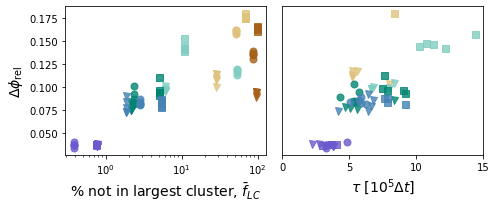

In [10]:

## Fetching Data

fname3 = "Equilib_DeltaPhi_NLC_tau.txt"
f3 = pandas.read_csv(datadir0 + fname3,sep = " ",header = 'infer')
Ebond = f3.Ebond.values
#Ebond= Ebond_.values
Strain = f3.Strain.values
Seed  = f3.Seed.values
NLC = f3.NLC.values
DeltaPhi = f3.DeltaPhi.values
Tau = f3.tau.values
fig,ax = plt.subplots(1,2,figsize = (7,3))
print(np.shape(Ebond[0]))

                 
chemengV = [3,4,5,6,7,100]
xStretchV = [100,150,200]
markes = ['v','o','s','+']
mss = [7,7,7,7,7]
alss = [0.8,0.8,0.8]


AvTau = np.zeros((len(chemengV),len(xStretchV)))
AvNLC = np.zeros((len(chemengV),len(xStretchV)))
AvDeltaPhi = np.zeros((len(chemengV),len(xStretchV)))
Count = np.zeros((len(chemengV),len(xStretchV)))
Count2 = np.zeros((len(chemengV),len(xStretchV)))
SqDPhi = np.zeros((len(chemengV),len(xStretchV)))
SqTau = np.zeros((len(chemengV),len(xStretchV)))
SqNLC = np.zeros((len(chemengV),len(xStretchV)))
#Marker = np.zeros((len(chemengV),len(xStretchV)))
#Clr = np.zeros((len(chemengV),len(xStretchV)))

for i in range(len(Ebond)):
    #print(Ebond[i])
    for pp in range(len(chemengV)):
        if Ebond[i] == chemengV[pp]:
            #print(Ebond[i],Strain[i])
            clr =  clrs3[pp]
            label2 = r"$E_{\mathrm{bond}} = $"+str(Ebond[i])
            for dd in range(len(xStretchV)):
                if Strain[i] == xStretchV[dd]:
                    
                    AvNLC[pp,dd] +=NLC[i]
                    AvDeltaPhi[pp,dd] +=DeltaPhi[i]
                    #SqDPhi[pp,dd] += (DeltaPhi[i]-AvDeltaPhi_[pp,dd])**2
                    #SqNLC[pp,dd] += (NLC[i]-AvNLC_[pp,dd])**2
                    Count[pp,dd]+=1
                    if NLC[i]<70 and Tau[i]< 3.6e8 :
                        #AvTau[pp,dd] +=Tau[i]
                        Count2[pp,dd]+=1
                        #SqTau[pp,dd] += (Tau[i] - AvTau_[pp,dd])**2
                        
                    
                    #Marker[pp,dd] = markes[dd]
                    #Clr[pp,dd] = clrs3[pp]
    for dd in range(len(xStretchV)):
        if Strain[i] == xStretchV[dd]:
            symb = markes[dd]
            ms = mss[dd]
            als = alss[dd]
            label1 = r"strain$ = $"+str(Strain[i])+r"$\%$"
            
    #ax.plot(Tau[i],DeltaPhi[i],marker = symb, color = clr)
    if i<15 and i%5==0:
        if NLC[i]<70 and Tau[i]< 3.6e8 :
            ax[1].plot(Tau[i],DeltaPhi[i],linestyle = '',marker = symb, color = clr,markersize = ms,alpha = als,label = label1)
    if Strain[i] == xStretchV[2] and i%4==0 and i!=88:
        print(i)
        if NLC[i]<70 and Tau[i]< 3.6e8 :
            ax[1].plot(Tau[i],DeltaPhi[i],linestyle = '',marker = symb, color = clr,markersize = ms,alpha = als,label = label2)
    #if i==3:
    #    ax.plot(Tau[i],DeltaPhi[i],marker = symb, color = clr,markersize = ms,label = label2)
    else:
        #print(Tau[i],DeltaPhi[i])
        if NLC[i]<50 and Tau[i]< 3.6e8 :
            ax[1].plot(Tau[i],DeltaPhi[i],linestyle = '',marker = symb, color = clr,alpha = als,markersize = ms)
    ax[0].plot(NLC[i],DeltaPhi[i],linestyle = '',marker = symb, color = clr,alpha = als,markersize = ms)
#ax.set_ylim([0.025,0.18])alpha = als,
#ax.set_ylim([0,20])
ax[1].set_xlabel(r"$\tau$ [$10^5\Delta t$]",fontsize = 14)
ax[0].set_xlabel(r"% not in largest cluster, $\bar{f}_{LC}$",fontsize = 14)
ax[0].set_ylabel(r"$\Delta\phi_{\mathrm{rel}}$",fontsize = 14)
#ax[1].set_ylabel(r"$\Delta\phi_{\mathrm{rel}}$",fontsize = 14)
#ax[1].legend(frameon=False,loc = [1,0])
ax[0].set_xscale('log')
#ax[0].set_ylim([0,0.18])
#ax[1].set_ylim([0,0.18])
ax[1].set_yticks([])
ax[1].set_xticks([0,1.2e8,2.4e8,3.6e8],['0','5','10','15'])

#leg = plt.legend(line_columns, ['']*len(line_columns), 
#             title='No Prop    Prop +    Prop *',  
#             ncol=3, numpoints=1, handletextpad=-0.5)




fig.tight_layout()
plotname = 'Equi_DeltaPhi_vs_tau_IvanEdits.pdf'
#fig.savefig(plotsdir+plotname)


/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_10848/2824796029.py:4: RuntimeWarning: invalid value encountered in divide
  ErrTau = np.sqrt(np.divide(SqTau,Count2))
/var/folders/wt/4tgp65891vd4l6wskkxdnvk40000gn/T/ipykernel_10848/2824796029.py:10: RuntimeWarning: invalid value encountered in divide
  AvTau_ = np.divide(AvTau,Count2)


[[0. 0. 0.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 4.]
 [5. 5. 5.]]
[[nan nan nan]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[94.144 86.336 97.536]
 [28.384 51.776 68.128]
 [ 6.048 54.208 10.816]
 [ 2.176  2.336  4.992]
 [ 1.824  2.816  5.344]
 [ 0.768  0.384  0.736]]
[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
[[0. 0. 0.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 4.]
 [5. 5. 5.]]
-0.1
-0.1
-0.1
-0.1
-0.1
-0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004
0.30000000000000004


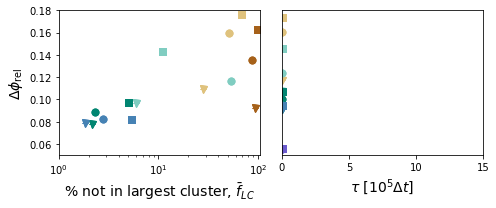

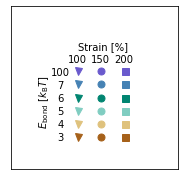

In [11]:
fig,ax = plt.subplots(1,2,figsize = (7,3))

ErrDPhi = np.sqrt(np.divide(SqDPhi,Count))
ErrTau = np.sqrt(np.divide(SqTau,Count2))
ErrNLC =np.sqrt(np.divide(SqNLC,Count))
print(Count2)

AvNLC_ = np.divide(AvNLC,Count)
AvDeltaPhi_ = np.divide(AvDeltaPhi,Count)
AvTau_ = np.divide(AvTau,Count2)
print(ErrTau)
print(AvTau)
print(AvNLC_)
print(Count)
print(Count2)
for dd in range(len(xStretchV)):
    for pp in range(len(chemengV)):
        ax[0].plot(AvNLC_[pp,dd],AvDeltaPhi_[pp,dd],marker =markes[dd],markersize = 7,color = clrs3[pp])
        ax[0].errorbar(AvNLC_[pp,dd],AvDeltaPhi_[pp,dd],xerr = ErrNLC[pp,dd],yerr = ErrDPhi[pp,dd],marker =markes[dd],markersize = 7,color = clrs3[pp],capsize = 3)
        #if AvNLC_[pp,dd]<70:
        ax[1].plot(AvTau_[pp,dd],AvDeltaPhi_[pp,dd],marker =markes[dd],markersize = 7,color = clrs3[pp])
        ax[1].errorbar(AvTau_[pp,dd],AvDeltaPhi_[pp,dd],yerr = ErrDPhi[pp,dd],xerr = ErrTau[pp,dd],marker =markes[dd],markersize = 7,color = clrs3[pp],capsize = 3)
## making legend table


ax[0].set_xlabel(r"% not in largest cluster, $\bar{f}_{LC}$",fontsize = 14)
ax[0].set_ylabel(r"$\Delta\phi_{\mathrm{rel}}$",fontsize = 14)
ax[0].set_ylim([0.05,0.18])    
ax[0].set_xlim([1,105])    
ax[0].set_xscale('log')
ax[1].set_yticks([])
ax[1].set_xticks([0,1.2e8,2.4e8,3.6e8],['0','5','10','15'])
ax[1].set_xlabel(r"$\tau$ [$10^5\Delta t$]",fontsize = 14)
fig.tight_layout()
plotname = "AveragedSeeds_Equi.pdf"
#fig.savefig(plotsdir+plotname)


fig2,ax2=plt.subplots(figsize = (3,3))

text1 = 'Strain [%]'
text11 = '100'
text12 = '150'
text13 = '200'
ax2.text(0.,1.35,text1)
ax2.text(-0.15,1.15,text11)
ax2.text(0.2,1.15,text12)
ax2.text(0.55,1.15,text13)


text2 = r'$E_{\mathrm{bond}}~[k_{\mathrm{B}}T]$'
text20 = '100'
text21 = '7'
text22 = '6'
text23 = '5'
text24 = '4'
text25 = '3'
ax2.text(-0.6,0.2,text2,rotation = 'vertical')
ax2.text(-0.4,0.95,text20)
ax2.text(-0.3,0.75,text21)
ax2.text(-0.3,0.55,text22)
ax2.text(-0.3,0.35,text23)
ax2.text(-0.3,0.15,text24)
ax2.text(-0.3,-0.05,text25)

for dd in range(len(xStretchV)):
    for pp in range(len(chemengV)):
        ax2.plot([0+dd*0.35],[0+pp*0.2],marker =markes[dd],linestyle = '',color = clrs3[pp],markersize = 7)
        print(-0.1+dd*0.2)

ax2.set_xlim([-1.,1.5])
ax2.set_ylim([-0.5,2.0])
ax2.set_xticks([])
ax2.set_yticks([])



plotname = "LegendTable.pdf"

#fig2.savefig(plotsdir+plotname)